In [8]:
! eups list -s lsst_distrib

   g0b29ad24fb+9b30730ed8 	w_latest current w_2022_40 setup


# Setting Jupyter environment on a SLAC/SDF 

TS8 is now being trasnferred to SDF's butler repository. SDF is a previous place where we were working on. We are now making a transition to S3DF. Before making the transition, we need to use SDF. This notebook instructs how to access TS8 images by JupyterLab on SDF.

Let's get started with accessing to SDF. Here we assume you have your Windows account. 

Using your ssh client, we'll connect to SDF. Make/Edit ~/.ssh/config file so that things get easier. Put something similar (change user name as yours) below

```
Host sdf
    User youtsumi
    Hostname sdf-login02.slac.stanford.edu
    ProxyCommand ssh ki-ls /usr/bin/nc %h %p
```

This is a "bookmark" in the ssh world. Complicate options can be encapsulated in this config file. Once you make this config file, commanding

```
> ssh sdf
```
will let you login to SDF. Then you have to setup your LSST environment

```
> source /cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_40/loadLSST.bash 
> pip instlal jupyterlab
> jupyter lab --no-browser
```
copy a Jupyter token, and then make another ssh connection to make you a port forwarding by the following command
```
> ssh -L 60088:localhost:8888 sdf
```
60088 can be different. I think it should be unique in a computer. So you have to pick some number (reasonably large but below 62535 because small numbers are reserved). Then you can use Jupyter from your local browser if you access to localhost:60088 with the token you got above

# Working inside the Jupyter world

Doing LSST specific stuff

Import Butler

see the detailed description https://pipelines.lsst.io/modules/lsst.daf.butler/index.html

The next cell shows what's in this repository. 

In [29]:
from lsst.daf.butler import Butler

repo_path = "/sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml"
#collections='LSST-TS8/raw/all'
butler = Butler(repo_path)
registry = butler.registry
    
subbutler = Butler(repo_path,collections=collections)
subregistry = subbutler.registry
print(subregistry)
for dtype in subregistry.queryDatasetTypes():
    try:
        datasetRefs = list(subregistry.queryDatasets(datasetType=dtype,collections=collections))
        if len(datasetRefs)>0:
            print(len(datasetRefs), dtype )
    except:
        print("Error", dtype )

PostgreSQL@rubin:bot_data_w_2021_43
310929 DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)


In [30]:
#where="instrument='LSST-TS8' AND exposure.science_program IN ('7106D') AND detector in (22) AND exposure.observation_type = 'bias'"
where="instrument='LSST-TS8' AND exposure.science_program IN ('7106D') AND detector in (22) AND exposure.observation_type = 'spot'"

subbutler = Butler(repo_path,collections=collections)
subregistry = subbutler.registry

# get an array of raw images
atyp = "raw"
datasetRefs = list(subregistry.queryDatasets(
    datasetType=atyp,collections=collections,
    where = where
))

i=1
print(datasetRefs[i].dataId, "/", len(datasetRefs))
raw = subbutler.get(datasetRefs[i])


{instrument: 'LSST-TS8', detector: 22, exposure: 202209300155367, ...} / 519


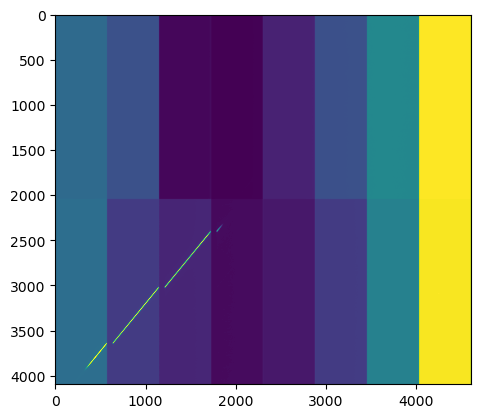

In [31]:
from astropy.visualization import ZScaleInterval
interval = ZScaleInterval()
vmin,vmax=interval.get_limits(raw.getImage().array)
pylab.imshow(raw.getImage().array,vmin=vmin,vmax=vmax)

----------------
The blow cells are just 

In [32]:
import pylab
# Pick a sensor
# Interesting sensors: 9 (C15/C16), 31 (C10) 
sensor = "R22_S12"
# (9, 23, 31, 83, 112, 136)
det = 22
raw = butler.get('bias', detector=det, instrument='LSST-TS8', collections="u/abrought/BF/run_7071D/sbias")

In [ ]:
import pylab
# Pick a sensor
# Interesting sensors: 9 (C15/C16), 31 (C10) 
sensor = "R22_S12"
# (9, 23, 31, 83, 112, 136)
det = 22
raw = butler.get('raw', detector=det, instrument='LSST-TS8', collections="LSST-TS8/raw/all", where="instrument='LSST-TS8' AND exposure.science_program IN ('7071D') AND detector in (22) AND exposure.observation_type = 'bias'")

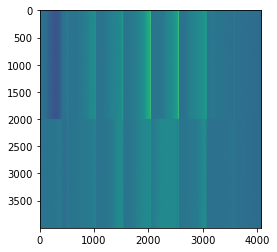

In [21]:
pylab.imshow(raw.getImage().array)

In [42]:
!butler query-data-ids /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml obs_id

lsst.daf.butler.cli.utils ERROR: Caught an exception, details are in traceback:
Traceback (most recent call last):
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/v23.0.0/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/daf_butler/23.0.0+d18c45d440/python/lsst/daf/butler/cli/cmd/commands.py", line 439, in query_data_ids
    table = script.queryDataIds(**kwargs)
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/v23.0.0/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/daf_butler/23.0.0+d18c45d440/python/lsst/daf/butler/script/queryDataIds.py", line 81, in queryDataIds
    results = butler.registry.queryDataIds(dimensions,
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/v23.0.0/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/daf_butler/23.0.0+d18c45d440/python/lsst/daf/butler/registries/sql.py", line 937, in queryDataIds
    requestedDimensions = self.dimensions.extract(dimensions)
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/v23.0.0/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/daf_butler/23.0.

In [47]:
!butler query-dimension-records /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml exposure.science_program

lsst.daf.butler.cli.utils ERROR: Caught an exception, details are in traceback:
Traceback (most recent call last):
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/v23.0.0/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/daf_butler/23.0.0+d18c45d440/python/lsst/daf/butler/registries/sql.py", line 988, in queryDimensionRecords
    element = self.dimensions[element]
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/v23.0.0/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/daf_butler/23.0.0+d18c45d440/python/lsst/daf/butler/core/dimensions/_universe.py", line 171, in __getitem__
    return self._elements[name]
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/v23.0.0/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/daf_butler/23.0.0+d18c45d440/python/lsst/daf/butler/core/named.py", line 351, in __getitem__
    return self._mapping[key]
KeyError: 'exposure.science_program'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/cvmfs/sw.lsst.eu/l

In [37]:
!butler query-dimension-records /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml exposure

instrument        id       physical_filter            obs_id            exposure_time dark_time  observation_type observation_reason day_obs  seq_num    group_name       group_id    target_name science_program tracking_ra tracking_dec sky_angle zenith_angle                       timespan [2]                      
---------- --------------- --------------- ---------------------------- ------------- ---------- ---------------- ------------------ -------- ------- --------------- --------------- ----------- --------------- ----------- ------------ --------- ------------ --------------------------------------------------------
  LSST-TS8 202110191909512         unknown TS_C_20211019_000036_R22_S01           0.0  0.0899999             bias               bias 20211019      36 202110191909512 202110191909512     UNKNOWN    20211019-TS8        None         None      None         None 2021-10-19 19:10:28.218989 .. 2021-10-19 19:10:28.218989
  LSST-TS8 202110191909543         unknown         TS_C

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



       spot          spot_flat 20220103    1458   3022010301458   3022010301458     UNKNOWN           13256        None         None      None         None 2022-01-03 23:58:16.569018 .. 2022-01-03 23:58:41.569018
   LSSTCam   3022010301459         unknown         MC_C_20220103_001459          25.0     25.462             spot          spot_flat 20220103    1459   3022010301459   3022010301459     UNKNOWN           13256        None         None      None         None 2022-01-03 23:58:50.998001 .. 2022-01-03 23:59:15.998001
   LSSTCam   3022010301460         unknown         MC_C_20220103_001460          25.0      25.47             spot          spot_flat 20220103    1460   3022010301460   3022010301460     UNKNOWN           13256        None         None      None         None 2022-01-03 23:59:24.696993 .. 2022-01-03 23:59:49.696993
   LSSTCam   3022010301461         unknown         MC_C_20220103_001461          25.0     25.575             spot          spot_flat 20220103    1461   30220

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [35]:
!butler query-dimension-records /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml detector

instrument  id  full_name  name_in_raft   raft   purpose 
---------- --- ----------- ------------ ------- ---------
  LSST-TS8   0 RTM-002_S00          S00 RTM-002   SCIENCE
  LSST-TS8   1 RTM-002_S01          S01 RTM-002   SCIENCE
  LSST-TS8   2 RTM-002_S02          S02 RTM-002   SCIENCE
  LSST-TS8   3 RTM-002_S10          S10 RTM-002   SCIENCE
  LSST-TS8   4 RTM-002_S11          S11 RTM-002   SCIENCE
  LSST-TS8   5 RTM-002_S12          S12 RTM-002   SCIENCE
  LSST-TS8   6 RTM-002_S20          S20 RTM-002   SCIENCE
  LSST-TS8   7 RTM-002_S21          S21 RTM-002   SCIENCE
  LSST-TS8   8 RTM-002_S22          S22 RTM-002   SCIENCE
  LSST-TS8   9 RTM-003_S00          S00 RTM-003   SCIENCE
  LSST-TS8  10 RTM-003_S01          S01 RTM-003   SCIENCE
  LSST-TS8  11 RTM-003_S02          S02 RTM-003   SCIENCE
  LSST-TS8  12 RTM-003_S10          S10 RTM-003   SCIENCE
  LSST-TS8  13 RTM-003_S11          S11 RTM-003   SCIENCE
  LSST-TS8  14 RTM-003_S12          S12 RTM-003   SCIENCE
  LSST-TS8  15